[View in Colaboratory](https://colab.research.google.com/github/rfuk0503/myPractice/blob/master/test.ipynb)

In [1]:
print("Hello World!")

Hello World!


In [2]:
import keras

Using TensorFlow backend.


In [0]:
import tensorflow

In [5]:
print(tensorflow.test.is_built_with_cuda())

False


In [6]:
print(tensorflow.test.is_built_with_cuda())

False


In [7]:
import torch

ModuleNotFoundError: ignored

In [8]:
!ls

sample_data


In [9]:
!ls -l

total 4
drwxr-xr-x 2 root root 4096 Sep 28 23:32 sample_data


In [10]:
!pwd

/content


In [11]:
!hostname

051dce5eca9c


In [12]:
!uname -a

Linux 051dce5eca9c 4.14.33+ #1 SMP Sat Aug 11 08:05:16 PDT 2018 x86_64 x86_64 x86_64 GNU/Linux


In [13]:
!ps aux

USER       PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root         1  0.0  0.0  39008  6352 ?        Ss   06:54   0:00 /bin/bash -e /d
root         9  0.1  0.3 677324 50500 ?        Sl   06:54   0:00 node /tools/nod
root        31  0.1  0.3 678132 44364 ?        Sl   06:54   0:00 /tools/node/bin
root        55  0.3  0.4 185228 57536 ?        Sl   06:54   0:01 /usr/bin/python
root        62  0.9  1.6 918032 225036 ?       Ssl  06:55   0:03 /usr/bin/python
root        84  0.0  0.1  54024 14760 ?        S    06:55   0:00 /usr/bin/python
root        98  0.0  0.0  63304  6656 ?        R    07:01   0:00 ps aux


In [15]:
!awk '{BEGIN{print "Hello AWK"}}'

awk: line 1: missing } near BEGIN
awk: line 1: extra '}'
awk: line 1: syntax error at or near end of line


In [16]:
!ls -l | awk '{ print $2}'

4
2


In [17]:
!ls -l

total 4
drwxr-xr-x 2 root root 4096 Sep 28 23:32 sample_data


In [18]:
!top

=top - 07:05:04 up 11 min,  0 users,  load average: 0.01, 0.04, 0.04
Tasks:   7 total,   1 running,   6 sleeping,   0 stopped,   0 zombie
%Cpu(s):  1.4 us,  1.2 sy,  0.0 ni, 94.0 id,  3.4 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem : 13335236 total, 10328344 free,   412904 used,  2593988 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12664108 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND     
    1 root      20   0   39008   6352   5092 S   0.0  0.0   0:00.09 run.sh      
    9 root      20   0  677324  50504  25428 S   0.0  0.4   0:00.86 node        
   31 root      20   0  679668  46056  25932 S   0.0  0.3   0:00.93 node        
   55 root      20   0  186260  57608  12216 S   0.0  0.4   0:01.44 jupyter-no+ 
   62 root      20   0  918032 225088  79496 S   0.0  1.7   0:03.80 python3     
   84 root      20   0   54024  14760   7636 S   0.0  0.1   0:00.08 python3     
  108 root      20   0   65356   7036   5280 R   0.0  0.1   0

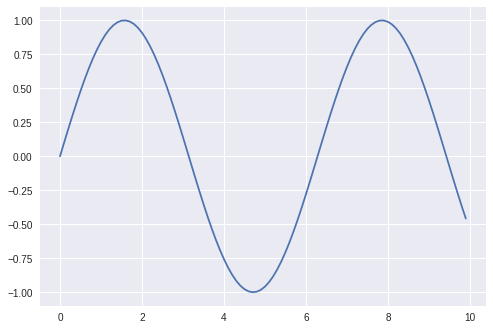

In [19]:

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,10,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [22]:
# -*- coding: utf-8 -*
#https://dev.classmethod.jp/machine-learning/introduction-keras-deeplearning/
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam
 
# Kerasに含まれるMNISTデータの取得
# 初回はダウンロードが発生するため時間がかかる
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 配列の整形と、色の範囲を0-255 -> 0-1に変換
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255
 
# 正解データを数値からダミー変数の形式に変換
# これは例えば0, 1, 2の3値の分類の正解ラベル5件のデータが以下のような配列になってるとして
#   [0, 1, 2, 1, 0]
# 以下のような形式に変換する
#   [[1, 0, 0],
#    [0, 1, 0],
#    [0, 0, 1],
#    [0, 1, 0],
#    [1, 0, 0]]
# 列方向が0, 1, 2、行方向が各データに対応し、元のデータで正解となる部分が1、それ以外が0となるように展開してる
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
 
# ネットワークの定義
# 各層や活性関数に該当するレイヤを順に入れていく
# 作成したあとにmodel.add()で追加することも可能
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
    ])

# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 学習処理の実行
model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=200, validation_split=0.1)
 
# 予測
score = model.evaluate(X_test, y_test, verbose=1)
print('test accuracy : ', score[1])

11493376/11490434 [==============================] - 1s 0us/step
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 63us/step - loss: 2.1005 - acc: 0.4486 - val_loss: 1.8690 - val_acc: 0.6698
Epoch 2/200
54000/54000 [==============================] - 3s 61us/step - loss: 1.7097 - acc: 0.6970 - val_loss: 1.5082 - val_acc: 0.7798
Epoch 3/200
54000/54000 [==============================] - 3s 62us/step - loss: 1.4045 - acc: 0.7575 - val_loss: 1.2288 - val_acc: 0.8225
Epoch 4/200
54000/54000 [==============================] - 3s 62us/step - loss: 1.1759 - acc: 0.7889 - val_loss: 1.0250 - val_acc: 0.8418
Epoch 5/200
54000/54000 [==============================] - 3s 63us/step - loss: 1.0111 - acc: 0.8084 - val_loss: 0.8797 - val_acc: 0.8595
Epoch 6/200
54000/54000 [==============================] - 3s 63us/step - loss: 0.8924 - acc: 0.8229 - val_loss: 0.7743 - val_acc: 0.8667
Epoch 7/200
54000/54000 [==============================] -

In [23]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          40G  7.7G   30G  21% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G     0  6.4G   0% /var/colab
/dev/sda1        46G  8.5G   37G  19% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!who

In [25]:
!which awk

/usr/bin/awk


In [26]:
# -*- coding: utf-8 -*
#https://qiita.com/fukuit/items/b3fa460577a0ea139c88
'''
Keras(+Tensorflow)でMNISTを実施する
学習中の進捗をグラフで表示する
'''

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import Callback, CSVLogger
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import argparse


class PlotLosses(Callback):
    '''
    学習中のlossについてlive plotする
    '''

    def on_train_begin(self, logs={}):
        '''
        訓練開始時に実施
        '''
        self.epoch_cnt = 0      # epochの回数を初期化
        plt.axis([0, self.epochs, 0, 0.25])
        plt.ion()               # pyplotをinteractive modeにする

    def on_train_end(self, logs={}):
        '''
        訓練修了時に実施
        '''
        plt.ioff()              # pyplotのinteractive modeをoffにする
        plt.legend(['loss', 'val_loss'], loc='best')
        plt.show()

    def on_epoch_end(self, epoch, logs={}):
        '''
        epochごとに実行する処理
        '''
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        x = self.epoch_cnt
        # epochごとのlossとval_lossをplotする
        plt.scatter(x, loss, c='b', label='loss')
        plt.scatter(x, val_loss, c='r', label='val_loss')
        plt.pause(0.05)
        # epoch回数をcount up
        self.epoch_cnt += 1


def plot_result(history):
    '''
    plot result
    全ての学習が終了した後に、historyを参照して、accuracyとlossをそれぞれplotする
    '''

    # accuracy
    plt.figure()
    plt.plot(history.history['acc'], label='acc', marker='.')
    plt.plot(history.history['val_acc'], label='val_acc', marker='.')
    plt.grid()
    plt.legend(loc='best')
    plt.title('accuracy')
    plt.savefig('graph_accuracy.png')
    plt.show()

    # loss
    plt.figure()
    plt.plot(history.history['loss'], label='loss', marker='.')
    plt.plot(history.history['val_loss'], label='val_loss', marker='.')
    plt.grid()
    plt.legend(loc='best')
    plt.title('loss')
    plt.savefig('graph_loss.png')
    plt.show()


def main(epochs=5, batch_size=128):
    '''
    MNISTの学習とその結果の表示
    @args:
        epochs: epochの回数
        batch_size: ミニバッチのサイズ
    '''

    # load MNIST data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
    x_train = x_train1
    y_train = y_train1

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
    x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1).astype('float32')/255
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

    # convert one-hot vector
    y_train = keras.utils.to_categorical(y_train, 10)
    y_valid = keras.utils.to_categorical(y_valid, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    print(model.summary())

    # callback function
    plot_losses = PlotLosses()      # グラフ表示(live plot)
    plot_losses.epochs = epochs
    csv_logger = CSVLogger('trainlog.csv')

    # train
    history = model.fit(x_train, y_train,
                        batch_size=batch_size, epochs=epochs,
                        verbose=1,
                        validation_data=(x_valid, y_valid),
                        callbacks=[plot_losses, csv_logger])

    # result
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {0}'.format(score[0]))
    print('Test accuracy: {0}'.format(score[1]))

    plot_result(history)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='MNIST')
    parser.add_argument('--epochs', dest='epochs', type=int, help='size of epochs')
    parser.add_argument('--batch_size', dest='batch_size', type=int, help='size of batch')
    args = parser.parse_args()
    if args.epochs:
        epochs = args.epochs
    else:
        epochs = 100
    if args.batch_size:
        batch_size = args.batch_size
    else:
        batch_size = 128

    main(epochs, batch_size)


usage: ipykernel_launcher.py [-h] [--epochs EPOCHS] [--batch_size BATCH_SIZE]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-2504fed7-3ec6-45e3-afda-60d69d8c6d8c.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [27]:
import caffe

ModuleNotFoundError: ignored

In [0]:
import cv2

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# アヤメデータの読み込み --- (*1)
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

In [30]:
iris_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
iris_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
iris.csv

NameError: ignored

In [1]:
conda info -e


SyntaxError: ignored

In [2]:
!conda info -e


/bin/bash: conda: command not found


In [3]:
!ls -al

total 16
drwxr-xr-x 4 root root 4096 Sep 28 23:32 .
drwxr-xr-x 1 root root 4096 Oct  6 13:24 ..
drwxr-xr-x 4 root root 4096 Sep 28 23:11 .config
drwxr-xr-x 2 root root 4096 Sep 28 23:32 sample_data


In [4]:
!cat .config


cat: .config: Is a directory


In [5]:
!ls -l .config


total 16
-rw-r--r-- 1 root root    7 Sep 28 23:11 active_config
-rw-r--r-- 1 root root    0 Sep 28 23:11 config_sentinel
drwxr-xr-x 2 root root 4096 Sep 28 23:11 configurations
-rw------- 1 root root    5 Sep 28 23:11 gce
drwxr-xr-x 3 root root 4096 Sep 28 23:11 logs


In [6]:
!cat /etc/cpuinfo


cat: /etc/cpuinfo: No such file or directory


In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
step

In [8]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [9]:
!lspci | grep VGA

/bin/bash: lspci: command not found


In [10]:
!uname -a

Linux 2b53adddc941 4.14.33+ #1 SMP Sat Aug 11 08:05:16 PDT 2018 x86_64 x86_64 x86_64 GNU/Linux


In [11]:
!cat /etc/issue

Ubuntu 17.10 \n \l



In [12]:
!dpkg -l

Desired=Unknown/Install/Remove/Purge/Hold
| Status=Not/Inst/Conf-files/Unpacked/halF-conf/Half-inst/trig-aWait/Trig-pend
|/ Err?=(none)/Reinst-required (Status,Err: uppercase=bad)
||/ Name           Version      Architecture Description
+++-==============-============-============-=================================
ii  adduser        3.113+nmu3ub all          add and remove users and groups
ii  apt            1.5.2        amd64        commandline package manager
ii  apt-utils      1.5.2        amd64        package management related utilit
ii  base-files     9.6ubuntu102 amd64        Debian base system miscellaneous 
ii  base-passwd    3.5.43       amd64        Debian base system master passwor
ii  bash           4.4-5ubuntu1 amd64        GNU Bourne Again SHell
ii  binutils       2.29.1-4ubun amd64        GNU assembler, linker and binary 
ii  binutils-commo 2.29.1-4ubun amd64        Common files for the GNU assemble
ii  binutils-x86-6 2.29.1-4ubun amd64        GNU binary utilities, for 

In [13]:
dpkg -l | grep nvidia

SyntaxError: ignored

In [15]:
!dpkg -l | grep cuda

ii  libcudart8.0:amd64          8.0.61-1                          amd64        NVIDIA CUDA Runtime Library


In [16]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [17]:
from keras.datasets import mnist
mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [18]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

cat: '/proc/driver/nvidia/gpus/0000:00:04.0/information': No such file or directory


In [19]:
!python -V


Python 3.6.3


In [4]:
!pip install -q http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 2.0MB 9.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [5]:
import torch
torch.cuda.is_available()

True

In [0]:
import torch


In [1]:
torch.cuda.is_available()

NameError: ignored

In [3]:
import tensorflow
print(tensorflow.test.is_built_with_cuda())

True


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

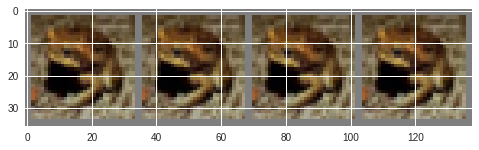

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

# 一つの画像だけ1の重みベクトルを作る．
weights = np.zeros(10000) # テストデータの数は10000
weights[300] = 1. # 300は適当
num_samples = 4 # サンプリングする回数

# WeightedRandomSamplerを試す．
my_sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, num_samples, replacement=True)
my_testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2, sampler=my_sampler)

my_testiter = iter(my_testloader)
images, labels = my_testiter.next()

# imshow関数は次に説明するけどちょっと先走って使う．
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(torchvision.utils.make_grid(images))

horse plane horse  bird


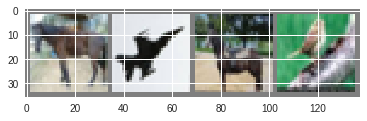

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))